In [22]:
##gerekli kütüphanelerin import edilmesi
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

#covid19 veri setinin yüklenmesi
csvfile=pd.read_csv("us-counties.csv")

## covid19 veri setinin ilk 5 satırının yazdırılması
print(csvfile.head())
print("________________________________________________")

         date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1     0.0
1  2020-01-22  Snohomish  Washington  53061.0      1     0.0
2  2020-01-23  Snohomish  Washington  53061.0      1     0.0
3  2020-01-24       Cook    Illinois  17031.0      1     0.0
4  2020-01-24  Snohomish  Washington  53061.0      1     0.0
________________________________________________


In [23]:

## covid19 veri setinin son 5 satırının yazdırılması
print(csvfile.tail())
print("________________________________________________")


               date      county    state     fips  cases  deaths
2502827  2022-05-13  Sweetwater  Wyoming  56037.0  11088   126.0
2502828  2022-05-13       Teton  Wyoming  56039.0  10074    16.0
2502829  2022-05-13       Uinta  Wyoming  56041.0   5643    39.0
2502830  2022-05-13    Washakie  Wyoming  56043.0   2358    44.0
2502831  2022-05-13      Weston  Wyoming  56045.0   1588    18.0
________________________________________________


In [24]:
## covid19 veri setindeki en son tarihli verinin filtrelenmesi (örneğin “2022-06-25”) ve yazdırılması
lastDate=csvfile['date'].max()
locC=csvfile.loc[csvfile['date']==lastDate]
print(locC)
print("________________________________________________")


               date      county    state     fips  cases  deaths
2499574  2022-05-13     Autauga  Alabama   1001.0  15863   216.0
2499575  2022-05-13     Baldwin  Alabama   1003.0  55862   681.0
2499576  2022-05-13     Barbour  Alabama   1005.0   5681    98.0
2499577  2022-05-13        Bibb  Alabama   1007.0   6457   105.0
2499578  2022-05-13      Blount  Alabama   1009.0  15005   243.0
...             ...         ...      ...      ...    ...     ...
2502827  2022-05-13  Sweetwater  Wyoming  56037.0  11088   126.0
2502828  2022-05-13       Teton  Wyoming  56039.0  10074    16.0
2502829  2022-05-13       Uinta  Wyoming  56041.0   5643    39.0
2502830  2022-05-13    Washakie  Wyoming  56043.0   2358    44.0
2502831  2022-05-13      Weston  Wyoming  56045.0   1588    18.0

[3258 rows x 6 columns]
________________________________________________


In [25]:
##veri setinin eyalet(state) bazında gruplanması
eyaletgrup=csvfile.groupby('state', group_keys=True).apply(lambda x: x)
print(eyaletgrup)
print("________________________________________________")

               date      county       state     fips  cases  deaths
0        2020-01-21   Snohomish  Washington  53061.0      1     0.0
1        2020-01-22   Snohomish  Washington  53061.0      1     0.0
2        2020-01-23   Snohomish  Washington  53061.0      1     0.0
3        2020-01-24        Cook    Illinois  17031.0      1     0.0
4        2020-01-24   Snohomish  Washington  53061.0      1     0.0
...             ...         ...         ...      ...    ...     ...
2502827  2022-05-13  Sweetwater     Wyoming  56037.0  11088   126.0
2502828  2022-05-13       Teton     Wyoming  56039.0  10074    16.0
2502829  2022-05-13       Uinta     Wyoming  56041.0   5643    39.0
2502830  2022-05-13    Washakie     Wyoming  56043.0   2358    44.0
2502831  2022-05-13      Weston     Wyoming  56045.0   1588    18.0

[2502832 rows x 6 columns]
________________________________________________


In [26]:

##toplam covid19 vaka sayısı (cases) ve ölü sayısının(deaths) bulunması
print("Total Cases sum:{}".format(csvfile['cases'].sum()))
print("Total Deaths sum:{}".format(csvfile['deaths'].sum()))
print("________________________________________________")

Total Cases sum:25112928228
Total Deaths sum:395173191.0
________________________________________________


In [27]:
##veri setinden “cases” ve “deaths” sütunlarının seçilmesi ve ilk 5 satırın yazdırılması
ilk5_CD=csvfile[['cases','deaths']].head()
print(ilk5_CD)
print("________________________________________________")


   cases  deaths
0      1     0.0
1      1     0.0
2      1     0.0
3      1     0.0
4      1     0.0
________________________________________________


In [28]:
##date_rate (ölüm oranı) isimli yeni bir sütun oluşturulması ve ilk 5 satırın yazdırılması
ilk5_CD['date_rate']={0:2,1:3,2:4,3:5,4:7}
ilk5_CD[['cases','deaths','date_rate']].head()
print(ilk5_CD)
print("________________________________________________")


   cases  deaths  date_rate
0      1     0.0          0
1      1     0.0          1
2      1     0.0          2
3      1     0.0          3
4      1     0.0          4
________________________________________________


In [29]:
## date_rate =(deaths/cases)*100
csvfile['date_rate']=(csvfile['deaths']/csvfile['cases'])*100
print(csvfile.head())
print("________________________________________________")


         date     county       state     fips  cases  deaths  date_rate
0  2020-01-21  Snohomish  Washington  53061.0      1     0.0        0.0
1  2020-01-22  Snohomish  Washington  53061.0      1     0.0        0.0
2  2020-01-23  Snohomish  Washington  53061.0      1     0.0        0.0
3  2020-01-24       Cook    Illinois  17031.0      1     0.0        0.0
4  2020-01-24  Snohomish  Washington  53061.0      1     0.0        0.0
________________________________________________


In [30]:
##indeksin resetlenerek sütun haline getirilmesi
csvfile.reset_index(inplace=True)
print(csvfile.head())

   index        date     county       state     fips  cases  deaths  date_rate
0      0  2020-01-21  Snohomish  Washington  53061.0      1     0.0        0.0
1      1  2020-01-22  Snohomish  Washington  53061.0      1     0.0        0.0
2      2  2020-01-23  Snohomish  Washington  53061.0      1     0.0        0.0
3      3  2020-01-24       Cook    Illinois  17031.0      1     0.0        0.0
4      4  2020-01-24  Snohomish  Washington  53061.0      1     0.0        0.0


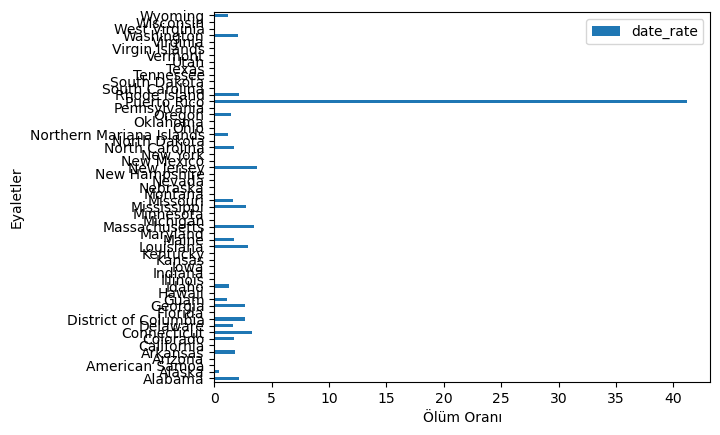

                      date_rate
state                          
Puerto Rico           41.146368
New Jersey             3.722534
Massachusetts          3.489078
Connecticut            3.318481
Louisiana              2.957805
Mississippi            2.723219
Georgia                2.685706
District of Columbia   2.638694
Rhode Island           2.195686
Alabama                2.177376
************************


c:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


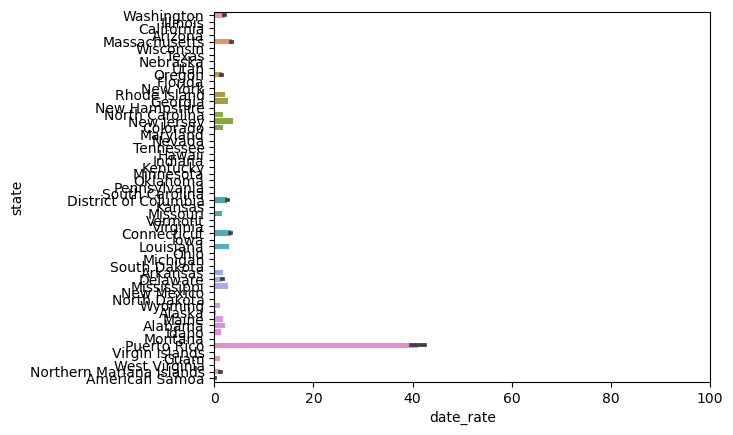

________________________________________________


In [34]:
##matplotlib.pyplot ve seaborn kütüphaneleri yardımıyla bar grafiğinin çizilmesi
##Bu bar grafiği ABD eyaletlerindeki Covid19 Ölüm oranlarını göstermelidir.
##Bu bar grafiği görseli ile eyaletlerdeki ölüm oranlarını karşılaştırma imkanı verecektir.
##Başı çeken Eyaletler ve ölüm oranları nelerdir? Rapor ediniz. Yani grafiği yorumlayınız..
##plt.figure(figsize=(30,7))
a=csvfile[['state','date_rate']]
a1=a.groupby('state',group_keys=True).mean()
a1.plot(kind="barh")
plt.xlabel("Ölüm Oranı")
plt.ylabel("Eyaletler")
plt.show()
b=a1.sort_values(by=['date_rate'], ascending=False).head(10)
print(b)
print("************************")

sns.barplot( x = "date_rate", y = "state",data = a)
plt.show()
print("________________________________________________")


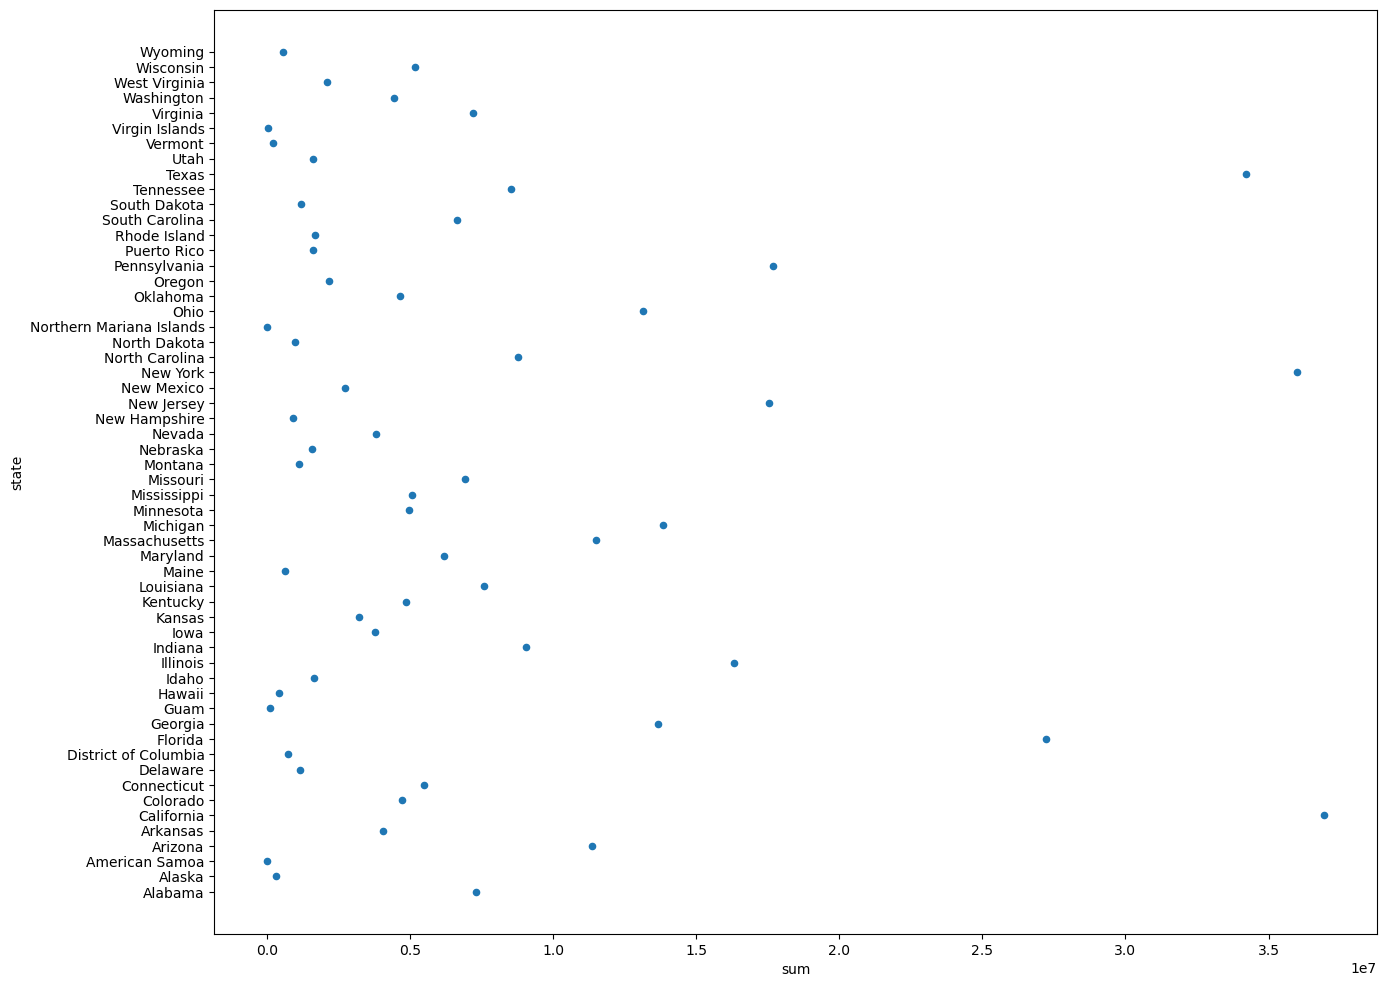

In [35]:
## İlçe (county) bazında eyalet toplamlarını alarak ölüm oranları bazında değerlendirebilmek için arı 
###sürüsü grafiği oluşturunuz…
##Bu grafik yardımıyla her bir eyaletteki Covid19 ölüm oranlarını ilçeler bazında inceleyiniz….
x2=csvfile[['county','state','deaths']]
filter_x2 = x2.loc[x2['deaths'] > 0]
filter_x3=filter_x2.groupby('state')['deaths'].agg(['sum','count'])
filter_x3.reset_index(inplace=True)
filter_x3.plot.scatter(x='sum',y='state', figsize=(15,12))
plt.show()

                       state         sum   count
0                    Alabama   7294870.0   49894
1                     Alaska    325853.0   12743
2             American Samoa       624.0      38
3                    Arizona  11347967.0   11342
4                   Arkansas   4056767.0   52009
5                 California  36935467.0   41163
6                   Colorado   4730426.0   40967
7                Connecticut   5477738.0    6760
8                   Delaware   1132465.0    2349
9       District of Columbia    723725.0     784
10                   Florida  27239119.0   50757
11                   Georgia  13673489.0  119338
12                      Guam    114798.0     783
13                    Hawaii    422331.0    2966
14                     Idaho   1634629.0   27554
15                  Illinois  16325451.0   71135
16                   Indiana   9055874.0   68458
17                      Iowa   3772302.0   68198
18                    Kansas   3201573.0   64155
19                  

<AxesSubplot:xlabel='sum', ylabel='state'>

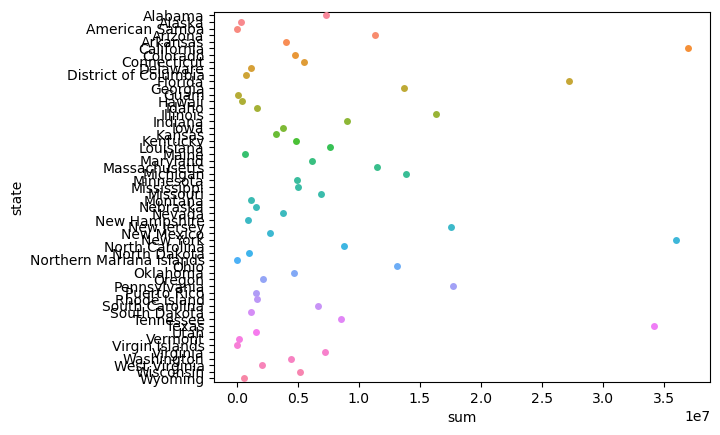

In [53]:
## İlçe (county) bazında eyalet toplamlarını alarak ölüm oranları bazında değerlendirebilmek için arı 
###sürüsü grafiği oluşturunuz…
##Bu grafik yardımıyla her bir eyaletteki Covid19 ölüm oranlarını ilçeler bazında inceleyiniz….
sns.swarmplot(data=filter_x3, x="sum", y="state")

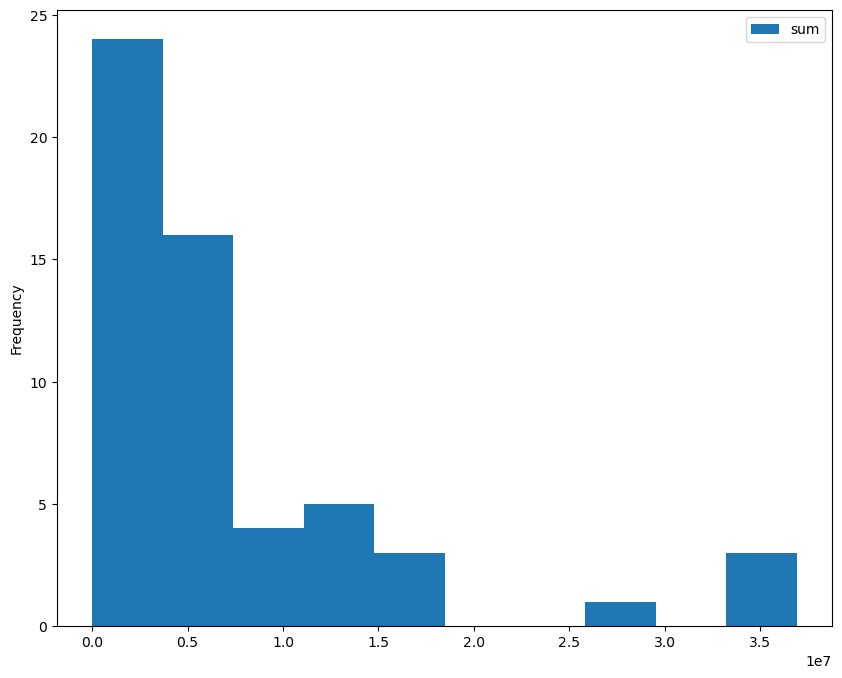

In [63]:
##Kümülatif Dağılım Fonksiyonu ve Grafiği elde ederek x ekseninin her noktasında en fazla 
## o noktaya ##kadar olan yüzde yoğunluğunu gösteren grafiği oluşturunuz.
#print(filter_x3)
ax = filter_x3.plot.hist(column=["sum"], figsize=(10, 8))

<AxesSubplot:xlabel='date_rate'>

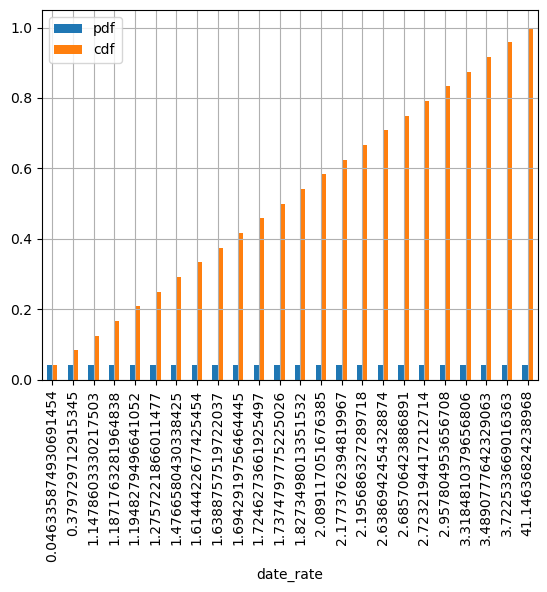

In [152]:
import scipy.stats as ss
#x=filter_x3['sum'].head(500)
#print(a1)
#print(filter_x3)
stats_df = a1 \
.groupby('date_rate') \
['date_rate'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'date_rate': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df

stats_df.plot.bar(x = 'date_rate', y = ['pdf', 'cdf'], grid = True)
